<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/06_pytorch_transfer_learning_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06. PyTorch Transfer Learning Exercises

Welcome to the 06. PyTorch Transfer Learning exercise template notebook.

There are several questions in this notebook and it's your goal to answer them by writing Python and PyTorch code.

> **Note:** There may be more than one solution to each of the exercises, don't worry too much about the *exact* right answer. Try to write some code that works first and then improve it if you can.

## Resources and solutions

* These exercises/solutions are based on [section 06. PyTorch Transfer Learning](https://www.learnpytorch.io/06_pytorch_transfer_learning/) of the Learn PyTorch for Deep Learning course by Zero to Mastery.

**Solutions:** 

Try to complete the code below *before* looking at these.

* See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/ueLolShyFqs).
* See an example [solutions notebook for these exercises on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/06_pytorch_transfer_learning_exercise_solutions.ipynb).

## 1. Make predictions on the entire test dataset and plot a confusion matrix for the results of our model compared to the truth labels. 
* **Note:** You will need to get the dataset and the trained model/retrain the model from notebook 06 to perform predictions.
* Check out [03. PyTorch Computer Vision section 10](https://www.learnpytorch.io/03_pytorch_computer_vision/#10-making-a-confusion-matrix-for-further-prediction-evaluation) for ideas.

In [1]:
# Import required libraries/code
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from torchvision import transforms, datasets

# Try to get torchinfo, install it if it doesn't work
#try:
#    from torchinfo import summary
#except:
#    print("[INFO] Couldn't find torchinfo... installing it.")
#    !pip install -q torchinfo
#    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
#try:
#    from going_modular.going_modular import data_setup, engine
#except:
#    # Get the going_modular scripts
#    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
#    !git clone https://github.com/mrdbourke/pytorch-deep-learning
#    !mv pytorch-deep-learning/going_modular .
#    !rm -rf pytorch-deep-learning
#    from going_modular.going_modular import data_setup, engine

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Get data 

In [3]:
import os
import requests
import zipfile

from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
#if image_path.is_dir():
#    print(f"{image_path} directory exists.")
#else:
#    print(f"Did not find {image_path} directory, creating one...")
#    image_path.mkdir(parents=True, exist_ok=True)
#    
#    # Download pizza, steak, sushi data
#    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
#        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
#        print("Downloading pizza, steak, sushi data...")
#        f.write(request.content)
#
#    # Unzip pizza, steak, sushi data
#    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
#        print("Unzipping pizza, steak, sushi data...") 
#        zip_ref.extractall(image_path)
#
#    # Remove .zip file
#    os.remove(data_path / "pizza_steak_sushi.zip")

# Setup Dirs
train_dir = image_path / "train"
test_dir = image_path / "test"

### Prepare data

In [4]:
import shutil
import requests

# Helper function file
try:
    from going_modular.sergio.helper_functions import plot_loss_curves
    print(f"[INFO] helper_functions.py already exists, skipping download")
except ImportError:
    print(f"[INFO] Couldn't find helper_functions.py, downloading...")
    with open("helper_functions.py", "wb") as f:
        request = requests.get("https://github.com/sergio-sanz-rodriguez/custom_python_functions/raw/refs/heads/main/pytorch/helper_functions.py")
        f.write(request.content)
    shutil.move("helper_functions.py", "going_modular/sergio/helper_functions.py")
    from going_modular.sergio.helper_functions import plot_loss_curves

# Engine file
try:
    from going_modular.sergio.engine import train
    print(f"[INFO] engine.py already exists, skipping download")
except ImportError:
    print(f"[INFO] Couldn't find engine.py, downloading...")
    with open("engine.py", "wb") as f:
        request = requests.get("https://github.com/sergio-sanz-rodriguez/custom_python_functions/raw/refs/heads/main/pytorch/engine.py")
        f.write(request.content)
    shutil.move("engine.py", "going_modular/sergio/engine.py")
    from going_modular.sergio.engine import train

# Data setup file
try:
    from going_modular.sergio.data_setup import create_dataloaders
    print(f"[INFO] data_setup.py already exists, skipping download")
except ImportError:
    print(f"[INFO] Couldn't find data_setup.py, downloading...")
    with open("data_setup.py", "wb") as f:
        request = requests.get("https://github.com/sergio-sanz-rodriguez/custom_python_functions/raw/refs/heads/main/pytorch/data_setup.py")
        f.write(request.content)
    shutil.move("data_setup.py", "going_modular/sergio/data_setup.py")
    from going_modular.sergio.data_setup import create_dataloaders


[INFO] helper_functions.py already exists, skipping download
[INFO] engine.py already exists, skipping download
[INFO] data_setup.py already exists, skipping download


In [5]:
# Create a transforms pipeline
#simple_transform = transforms.Compose([
#    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
#    transforms.ToTensor(), # 2. Turn image values to between 0 & 1 
#    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
#                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
#])

from torchvision.transforms import v2
simple_transform = v2.Compose([
    v2.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    v2.ToImage(), v2.ToDtype(torch.float32, scale=True), # 2. convert to tensor and normalize
    v2.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                 std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [6]:
# Create training and testing DataLoader's as well as get a list of class names
train_dataloader, test_dataloader, class_names = create_dataloaders(train_dir=train_dir,
                                                                    test_dir=test_dir,
                                                                    transform=simple_transform, # resize, convert images to between 0 & 1 and normalize them
                                                                    batch_size=16)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x14b6a77fed0>,
 ['pizza', 'steak', 'sushi'])

### Get and prepare a pretrained model

In [7]:
# Setup the model with pretrained weights and send it to the target device 
#model_0 = torchvision.models.efficientnet_b0(pretrained=True).to(device)
#model_0 # uncomment to output (it's very long)

weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights 
model_0 = torchvision.models.efficientnet_b0(weights=weights).to(device)

In [8]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model_0.features.parameters():
    param.requires_grad = False

In [9]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model_0.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

### Train model

In [10]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

In [11]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Setup training and save the results
model_0_results = train(model=model_0,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0384 | train_acc: 0.4667 | test_loss: 0.8042 | test_acc: 0.7341
Epoch: 2 | train_loss: 0.7933 | train_acc: 0.7958 | test_loss: 0.6573 | test_acc: 0.8761
Epoch: 3 | train_loss: 0.6611 | train_acc: 0.7833 | test_loss: 0.5676 | test_acc: 0.9068
Epoch: 4 | train_loss: 0.5730 | train_acc: 0.8292 | test_loss: 0.4881 | test_acc: 0.8943
Epoch: 5 | train_loss: 0.4907 | train_acc: 0.8667 | test_loss: 0.4930 | test_acc: 0.9318
[INFO] Total training time: 91.874 seconds


### Make predictions on the entire test dataset with the model

In [12]:
from tqdm.auto import tqdm

y_preds = []
y_probs = []
model_0.eval()
model_0.to(device)
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):

        # Send data and targets to target device
        X, y = X.to(device), y.to(device)
        
        # Do the forward pass
        y_logit = model_0(X)

        # Turn predictions from logits -> prediction probabilities -> predictions labels
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        y_prob = torch.softmax(y_logit, dim=1).max(dim=1)[0]
        
        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())
        y_probs.append(y_prob.cpu())

# Concatenate list of predictions into a tensor
test_pred_tensor = torch.cat(y_preds)
test_prob_tensor = torch.cat(y_probs)

Making predictions:   0%|          | 0/5 [00:01<?, ?it/s]

### Make a confusion matrix with the test preds and the truth labels

In [13]:
y_preds = test_pred_tensor.tolist()
y_probs = test_prob_tensor.tolist()

Need the following libraries to make a confusion matrix:
* torchmetrics - https://torchmetrics.readthedocs.io/en/stable/
* mlxtend - http://rasbt.github.io/mlxtend/

In [14]:
# See if torchmetrics exists, if not, install it
#try:
#    import torchmetrics, mlxtend
#    print(f"mlxtend version: {mlxtend.__version__}")
#    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
#except:
#    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
#    import torchmetrics, mlxtend
#    print(f"mlxtend version: {mlxtend.__version__}")

In [15]:
#import torchmetrics

In [16]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.1


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "c:\Users\ssre_\.conda\envs\.venv_pytorch_gpu\Lib\multiprocessing\queues.py", line 239, in _feed
Exception ignored in: <function _ConnectionBase.__del__ at 0x0000014B5C4CAF20>
Traceback (most recent call last):
  File "c:\Users\ssre_\.conda\envs\.venv_pytorch_gpu\Lib\multiprocessing\connection.py", line 133, in __del__
    reader_close()
  File "c:\Users\ssre_\.conda\envs\.venv_pytorch_gpu\Lib\multiprocessing\connection.py", line 178, in close
    self._close()
  File "c:\Users\ssre_\.conda\envs\.venv_pytorch_gpu\Lib\multiprocessing\connection.py", line 282, in _close
    _CloseHandle(self._handle)
OSError: [WinError 6] The handle is invalid
    self._close()
  File "c:\Users\ssre_\.conda\envs\.venv_pytorch_gpu\Lib\multiprocessing\connection.py", line 282, in _close
    _CloseHandle(self._handle)
OSError: [WinError 6] The handle is invalid

During handling of the above exception, another exception occurred

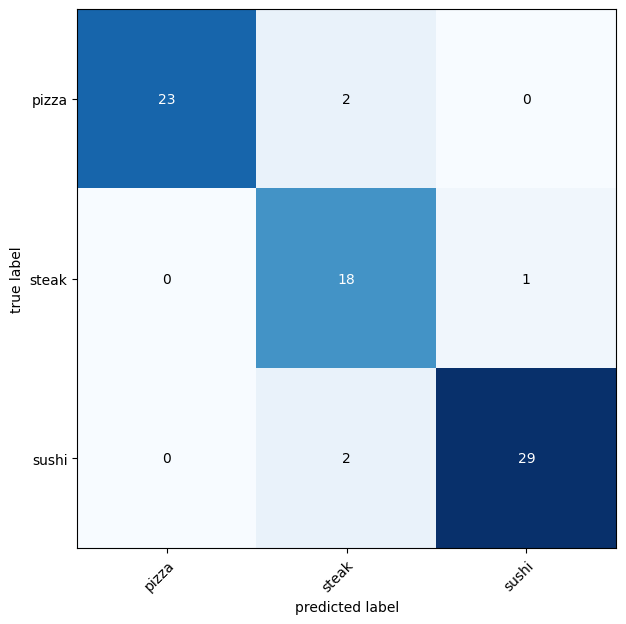

In [17]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

test_data_tensor = torch.tensor(test_dataloader.dataset.targets)
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=test_pred_tensor,
                         target=test_data_tensor)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 2. Get the "most wrong" of the predictions on the test dataset and plot the 5 "most wrong" images. You can do this by:
* Predicting across all of the test dataset, storing the labels and predicted probabilities.
* Sort the predictions by *wrong prediction* and then *descending predicted probabilities*, this will give you the wrong predictions with the *highest* prediction probabilities, in other words, the "most wrong".
* Plot the top 5 "most wrong" images, why do you think the model got these wrong?

You'll want to:
* Create a DataFrame with sample, label, prediction, pred prob
* Sort DataFrame by correct (does label == prediction)
* Sort DataFrame by pred prob (descending)
* Plot the top 5 "most wrong" image predictions

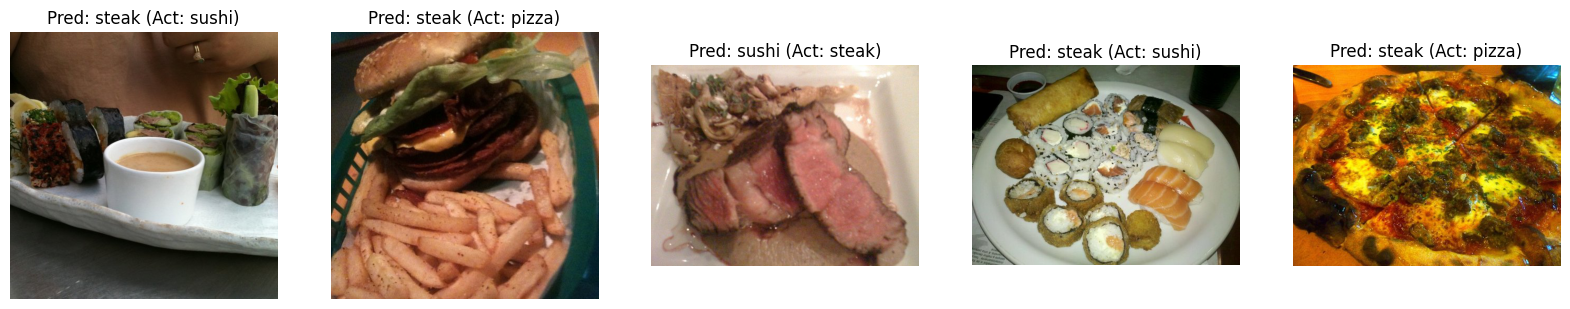

In [18]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
sample = [i[0] for i in test_dataloader.dataset.imgs]
#sample = [path.replace('data\\pizza_steak_sushi\\test\\', '') for path in sample]
label = [i[1] for i in test_dataloader.dataset.imgs]
prediction = y_preds
prob = y_probs

len(sample), len(label), len(prediction), len(prob)
df = pd.DataFrame({'sample': sample, 'label': label, 'prediction': prediction, 'prob': prob})
df['match'] = df['label'] == df['prediction']
df_wrong = df[df['match'] == False]
df_wrong_sorted = df_wrong.sort_values(by='prob', ascending=False)
df_top_wrong = df_wrong_sorted.head(5)
df_top_wrong.reset_index(inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
for ax, row in zip(axes, df_top_wrong.index):
    img = plt.imread(df_top_wrong.loc[row, 'sample'])
    ax.imshow(img)
    predicted = df_top_wrong.loc[row, 'prediction']
    predicted_class = class_names[predicted]
    actual = df_top_wrong.loc[row, 'label']
    actual_class = class_names[actual]
    ax.set_title(f"Pred: {predicted_class} (Act: {actual_class})")
    ax.axis('off')


## 3. Predict on your own image of pizza/steak/sushi - how does the model go? What happens if you predict on an image that isn't pizza/steak/sushi?
* Here you can get an image from a website like http://www.unsplash.com to try it out or you can upload your own.

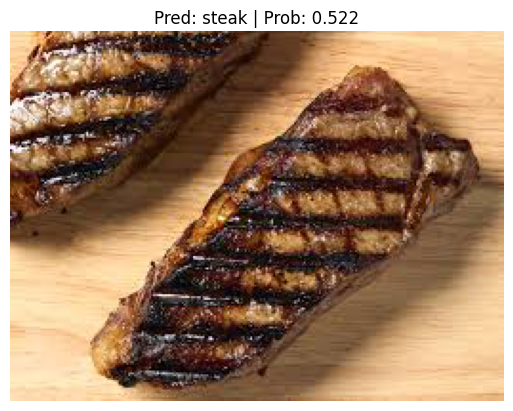

In [19]:
# TODO: Get an image of pizza/steak/sushi
from going_modular.sergio.helper_functions import pred_and_plot_image_imagenet
pred_and_plot_image_imagenet(model=model_0, 
                        image_path='data/steak_test.jpg',
                        class_names=class_names,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))

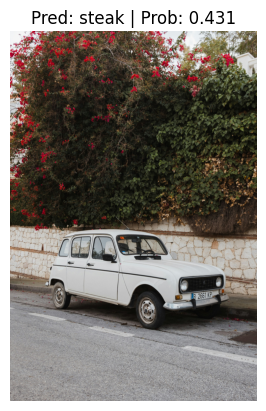

In [20]:
# TODO: Get an image of not pizza/steak/sushi
pred_and_plot_image_imagenet(model=model_0, 
                        image_path='data/polina-kuzovkova-EwctMLk1B-8-unsplash.jpg',
                        class_names=class_names,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))

## 4. Train the model from section 4  in notebook 06 part 3 for longer (10 epochs should do), what happens to the performance?

* See the model in notebook 06 part 3 for reference: https://www.learnpytorch.io/06_pytorch_transfer_learning/#3-getting-a-pretrained-model

In [21]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights 
model_1 = torchvision.models.efficientnet_b0(weights=weights).to(device)

for param in model_1.features.parameters():
    param.requires_grad = False

model_1.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [ ]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

# Setup training and save the results
model_1_results = train(model=model_1,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0413 | train_acc: 0.4500 | test_loss: 0.8084 | test_acc: 0.7705
Epoch: 2 | train_loss: 0.7955 | train_acc: 0.7417 | test_loss: 0.6631 | test_acc: 0.8886
Epoch: 3 | train_loss: 0.6556 | train_acc: 0.8042 | test_loss: 0.5821 | test_acc: 0.9318
Epoch: 4 | train_loss: 0.5652 | train_acc: 0.8375 | test_loss: 0.4986 | test_acc: 0.9318
Epoch: 5 | train_loss: 0.4779 | train_acc: 0.8583 | test_loss: 0.5013 | test_acc: 0.9193
Epoch: 6 | train_loss: 0.4657 | train_acc: 0.8458 | test_loss: 0.4341 | test_acc: 0.9318
Epoch: 7 | train_loss: 0.3955 | train_acc: 0.9292 | test_loss: 0.3962 | test_acc: 0.9318
Epoch: 8 | train_loss: 0.3997 | train_acc: 0.8792 | test_loss: 0.3948 | test_acc: 0.9443


With 10 epochs the accuracy improves

### Create DataLoaders

In [ ]:
# Create a transforms pipeline
#simple_transform = transforms.Compose([
#    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
#    transforms.ToTensor(), # 2. Turn image values to between 0 & 1 
#    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
#                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
#])

In [ ]:
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# Setup Dirs
train_dir_20_percent = image_path / "train"
test_dir_20_percent = image_path / "test"

# Create training and testing DataLoader's as well as get a list of class names
train_dataloader_20_percent, test_dataloader_20_percent, class_names = create_dataloaders(train_dir=train_dir_20_percent,
                                                                                        test_dir=test_dir_20_percent,
                                                                                        transform=simple_transform, # resize, convert images to between 0 & 1 and normalize them
                                                                                        batch_size=16)

train_dataloader_20_percent, test_dataloader_20_percent, class_names

(<torch.utils.data.dataloader.DataLoader at 0x1bab2fa9950>,
 ['pizza', 'steak', 'sushi'])

### Get a pretrained model

In [ ]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights 
model_2 = torchvision.models.efficientnet_b0(weights=weights).to(device)

for param in model_2.features.parameters():
    param.requires_grad = False

model_2.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

### Train a model with 20% of the data

In [ ]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

# Setup training and save the results
model_2_results = train(model=model_2,
                       train_dataloader=train_dataloader_20_percent,
                       test_dataloader=test_dataloader_20_percent,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4651 | train_acc: 0.8500 | test_loss: 0.3551 | test_acc: 0.9284
Epoch: 2 | train_loss: 0.3761 | train_acc: 0.8938 | test_loss: 0.3162 | test_acc: 0.9284
Epoch: 3 | train_loss: 0.3795 | train_acc: 0.9104 | test_loss: 0.2960 | test_acc: 0.9284
Epoch: 4 | train_loss: 0.3061 | train_acc: 0.9146 | test_loss: 0.2962 | test_acc: 0.9222
Epoch: 5 | train_loss: 0.3246 | train_acc: 0.9125 | test_loss: 0.2773 | test_acc: 0.9193
[INFO] Total training time: 89.704 seconds


## 6. Try a different model from [`torchvision.models`](https://pytorch.org/vision/stable/models.html) on the Pizza, Steak, Sushi data, how does this model perform?
* You'll have to change the size of the classifier layer to suit our problem.
* You may want to try an EfficientNet with a higher number than our B0, perhaps `torchvision.models.efficientnet_b2()`?
  * **Note:** Depending on the model you use you will have to prepare/transform the data in a certain way.

In [ ]:
# Create a transform to transform the data
# effnet b2 uses 288x288
effnetb2_transform = v2.Compose([
    v2.Resize((288, 288)), # 1. Reshape all images to 288x288 (though some models may require different sizes)
    v2.ToImage(), v2.ToDtype(torch.float32, scale=True), # 2. convert to tensor and normalize
    v2.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                 std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

# Import the data
train_dataloader_effnet_b2, test_dataloader_effnet_b2, class_names = create_dataloaders(train_dir=train_dir,
                                                                                        test_dir=test_dir,
                                                                                        transform=effnetb2_transform,
                                                                                        batch_size=16)


weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT # .DEFAULT = best available weights 
model_3 = torchvision.models.efficientnet_b2(weights=weights).to(device)

for param in model_3.features.parameters():
    param.requires_grad = False

model_3.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)

# Setup training and save the results
model_3_results = train(model=model_3,
                       train_dataloader=train_dataloader_effnet_b2,
                       test_dataloader=test_dataloader_effnet_b2,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Which one did the best?

Experiments:
* model_0 = 10% data, effnet_b0, 5 epochs
* model_1 = 10% data, effnet_b0, 10 epochs (double training time)
* model_2 = 20% data, effnet_b0, 5 epochs (double data)
* model_3 = 10% data, effnet_b2, 5 epochs (double model parameters)

In [ ]:
# Check effnet_b0 results with 10% of data for 5 epochs
max(model_0_results["test_acc"]), min(model_0_results["test_loss"])

In [ ]:
# Check effnet_b0 results with 10% of data for 10 epochs (double training time)
max(model_1_results["test_acc"]), min(model_1_results["test_loss"])

In [ ]:
# Check effnet_b0 results with 20% of data for 5 epochs (double data)
max(model_2_results["test_acc"]), min(model_2_results["test_loss"])

In [ ]:
# Check effnet_b2 results with 10% of data for 5 epochs (double model parameters)
max(model_3_results["test_acc"]), min(model_3_results["test_loss"])